In [1]:
import pandas as pd
import uncertainties
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rpc = pd.read_pickle("../../data/mobfw/rpc.pkl")
rpc_2021 = rpc[(rpc["start_datetime"].dt.year == 2021) & (rpc["end_datetime"].dt.year == 2021)]
rpc_202110 = rpc[(rpc["start_datetime"].dt.month == 10) &  (rpc["start_datetime"].dt.year == 2021) & (rpc["end_datetime"].dt.month == 10) &  (rpc["end_datetime"].dt.year == 2021)]
metro_codes = [38320, 38320, 38560, 38800, 38640, 38700, 38420, 38130, 38320, 38600, 38120, 38610, 38000, 38450, 38320, 38560, 38240, 38450, 38120, 38220, 38420, 38450, 38220, 38360, 38320, 38800, 38120, 38950, 38220, 38120, 38450, 38400, 38950, 38760, 38220, 38700, 38700, 38360, 38220, 38170, 38180, 38700, 38760, 38410, 38410, 38610, 38113, 38450, 38220]
rpc_postal_codes_ok = rpc[~rpc["start_postalcode"].isna() & ~rpc["end_postalcode"].isna()]
rpc_metro = rpc_postal_codes_ok[(rpc_postal_codes_ok["start_postalcode"].astype(int).isin(metro_codes) | rpc_postal_codes_ok["end_postalcode"].astype(int).isin(metro_codes))]

In [21]:
mileage_carpooling = rpc_2021["distance"].sum() / 1000
print("distance parcourue en covoiturage (km) : ", mileage_carpooling)

mileage_car = ((rpc_2021["passenger_seats"] + 1) * rpc_2021["distance"]).sum() / 1000
print("distance parcourue en autosolisme (km) :", mileage_car)

avoided_mileage = mileage_car - mileage_carpooling
print("km évités :", avoided_mileage)

emission_factor_car = uncertainties.ufloat(0.192,.2*.195)
avoided_ghg = avoided_mileage * emission_factor_car
print("émissions évitées (kgCO2e) :", avoided_ghg / 1e3)

print("Nombre de voyageurs RPC en octobre 2021 :", (rpc_202110["passenger_seats"] + 1).sum())

distance parcourue en covoiturage (km) :  26329726.481
distance parcourue en autosolisme (km) : 52661526.457
km évités : 26331799.976000004
émissions évitées (kgCO2e) : (5.1+/-1.0)e+03
Nombre de voyageurs RPC en octobre 2021 : 428333


Text(0.5, 1.0, 'Distribution des distances parcourues du RPC')

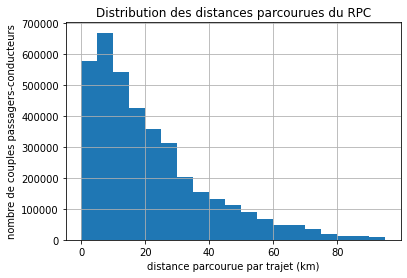

In [5]:
(rpc["distance"] / 1000).hist(bins=range(0,100,5))
plt.ylabel("nombre de couples passagers-conducteurs")
plt.xlabel("distance parcourue par trajet (km)")
plt.title("Distribution des distances parcourues du RPC")

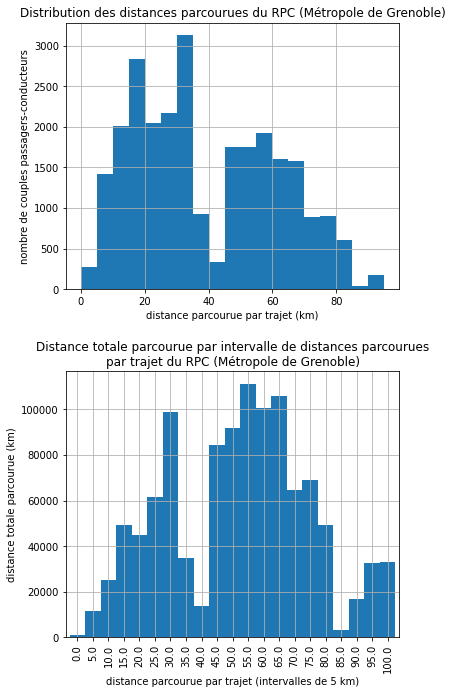

In [20]:
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
(rpc_metro["distance"] / 1000).hist(bins=range(0,100,5))
plt.ylabel("nombre de couples passagers-conducteurs")
plt.xlabel("distance parcourue par trajet (km)")
plt.title("Distribution des distances parcourues du RPC (Métropole de Grenoble)")

plt.subplot(2,1,2)
distance_bins = rpc_metro.groupby(pd.cut(rpc_metro["distance"], np.arange(0,max(rpc_metro["distance"])+5000,5000))).sum()
distance_bins.index = np.arange(0,max(rpc_metro["distance"])/1000,5)
distance_bins["distance"] = distance_bins["distance"] / 1000
distance_bins["distance"].loc[:100].plot(kind="bar", width=1, title="Distance totale parcourue par intervalle de distances parcourues\npar trajet du RPC (Métropole de Grenoble)", ylabel="distance totale parcourue (km)", xlabel="distance parcourue par trajet (intervalles de 5 km)")
plt.grid()

plt.tight_layout(pad=2)

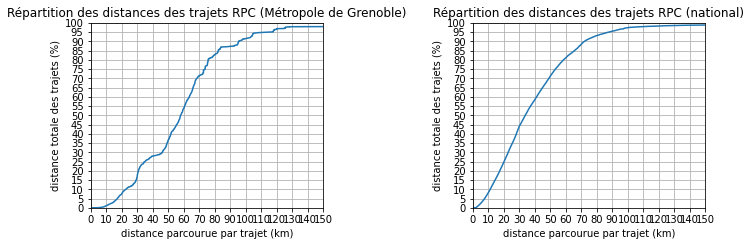

In [17]:
xmax = 150
xstep = 10
ystep = 5
fig = plt.figure(figsize=(12,6))

cumsum_distance = rpc_metro["distance"].sort_values().cumsum()
distances = rpc_metro["distance"].sort_values()
plt.subplot(1,2,1)
plt.xticks(range(0, xmax + xstep, xstep))
plt.yticks(np.arange(0, 100 + ystep, ystep))
plt.plot(distances / 1000, cumsum_distance / rpc_metro["distance"].sum() * 100)
plt.xlim((0, xmax))
plt.ylim((0, 100))
plt.ylabel("distance totale des trajets (%)")
plt.xlabel("distance parcourue par trajet (km)")
plt.title("Répartition des distances des trajets RPC (Métropole de Grenoble)")
plt.grid()

cumsum_distance = rpc["distance"].sort_values().cumsum()
distances = rpc["distance"].sort_values()
plt.subplot(1,2,2)
plt.xticks(range(0, xmax + xstep, xstep))
plt.yticks(np.arange(0, 100 + ystep, ystep))
plt.plot(distances / 1000, cumsum_distance / rpc["distance"].sum() * 100)
plt.xlim((0, xmax))
plt.ylim((0, 100))
plt.ylabel("distance totale des trajets (%)")
plt.xlabel("distance parcourue par trajet (km)")
plt.title("Répartition des distances des trajets RPC (national)")
plt.grid()

plt.tight_layout(pad=10)